In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [9]:
# Load and preprocess data
data = pd.read_csv('MSFT.csv')
print(data.head())
print(data.tail())
prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

         Date        Open        High         Low       Close   Adj Close  \
0  2022-08-08  284.049988  285.920013  279.320007  280.320007  277.636322   
1  2022-08-09  279.640015  283.079987  277.609985  282.299988  279.597321   
2  2022-08-10  288.170013  289.809998  286.940002  289.160004  286.391663   
3  2022-08-11  290.850006  291.209991  286.510010  287.019989  284.272156   
4  2022-08-12  288.480011  291.910004  286.940002  291.910004  289.115356   

     Volume  
0  18739200  
1  23405200  
2  24687800  
3  20065900  
4  22619700  
           Date        Open        High         Low       Close   Adj Close  \
247  2023-08-02  333.630005  333.630005  326.359985  327.500000  327.500000   
248  2023-08-03  326.000000  329.880005  325.950012  326.660004  326.660004   
249  2023-08-04  331.880005  335.140015  327.239990  327.779999  327.779999   
250  2023-08-07  328.369995  331.109985  327.519989  330.109985  330.109985   
251  2023-08-08  326.959991  328.750000  323.000000  326.0

In [4]:
# Create sequences and target variable
sequence_length = 10
sequences = []
targets = []
for i in range(len(scaled_prices) - sequence_length):
    sequences.append(scaled_prices[i:i+sequence_length])
    targets.append(scaled_prices[i+sequence_length])

X = np.array(sequences)
y = np.array(targets)

In [5]:
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 1s 35ms/step - loss: 0.1201 - val_loss: 0.5559
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0757 - val_loss: 0.3520
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0388 - val_loss: 0.1503
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0129 - val_loss: 0.0254
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0097 - val_loss: 0.0248
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0081 - val_loss: 0.0232
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0072 - val_loss: 0.0156
Epoch 9/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.0049
Epoch 10/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 11/50
7/7 [====================

In [7]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

2/2 [==============================] - 0s 11ms/step


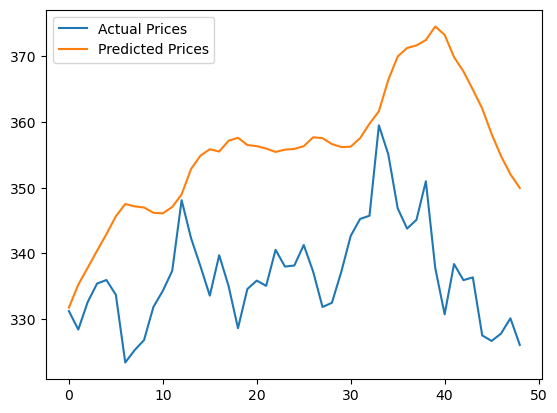

In [8]:
# Visualize results
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()